## EVD transmission model from Khan et al 2015 using Python/SciPy

Author: Verity Hill @ViralVerity

Date: 2018-10-03

In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import ode, solve_ivp
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [2]:
def LIB(times, init, paramsLIB):
    beta, eta, psi, pi, p, alpha, thetaI, thetaH, tau, mu, deltaI, deltaH = paramsLIB 
    SL,SH,E,I,H,R = init
    
    #N = ST + E + I + R
    N = SL + SH + E + I + H + R
    
    lamb = beta * ((I + (eta*H))/N)
    
    dSL = pi*(1-p) - lamb*SL - mu*SL 
    dSH = pi*p - lamb*psi*SH - mu*SH
    
    dE = lamb*(SL + psi*SH) - (alpha + mu)*E 
    
    dI = alpha*E - (tau + thetaI + deltaI + mu)*I
    dH = tau*I - (thetaH + deltaH + mu)*H
    
    dR = thetaI*I + thetaH*H - mu*R
        
    return(dSL, dSH, dE, dI, dH, dR)

In [3]:
def SL(times, init, paramsSL):
    beta, eta, psi, pi, p, alpha, thetaI, thetaH, tau, mu, deltaI, deltaH = paramsSL 
    SL,SH,E,I,H,R = init
    
    #N = ST + E + I + R
    N = SL + SH + E + I + H + R
    
    lamb = beta * (I + (eta*H))/N
    
    dSL = pi*(1-p) - lamb*SL - mu*SL 
    dSH = pi*p - lamb*psi*SH - mu*SH
    
    dE = lamb*(SL + psi*SH) - (alpha + mu)*E 
    
    dI = alpha*E - (tau + thetaI + deltaI + mu)*I
    dH = tau*I - (thetaH + deltaH + mu)*H
    
    dR = thetaI*I + thetaH*H - mu*R
    
    return(dSL, dSH, dE, dI, dH, dR) 

In [4]:
#For Liberia
paramsLIB = [0.371, 0.7, 1.6, 1.7, 0.2, 0.1, 0.1, 0.2, 0.16, (1/63)/365, 0.1, 0.5]

In [5]:
#For Sierra Leone
paramsSL = [0.361, 0.7, 1.6, 1.7, 0.2, 0.1, 0.1, 0.2, 0.16, (1/63)/365, 0.1, 0.5]

In [6]:
#For both
init = [1000000, 20000, 15, 10, 0, 0]
times = np.linspace(0, 200, 200)

In [7]:
sol_LIB = solve_ivp(fun=lambda t, y: LIB(t, y, paramsLIB), t_span=[min(times),max(times)], y0=init, t_eval=times)

In [8]:
output_LIB = pd.DataFrame({"t":sol_LIB["t"],"SL":sol_LIB["y"][0],"SH": sol_LIB["y"][1],"E":sol_LIB["y"][2],"I":sol_LIB["y"][3], "H":sol_LIB["y"][4], "R":sol_LIB["y"][5]})

In [9]:
sol_SL = solve_ivp(fun=lambda t, y: SL(t, y, paramsSL), t_span=[min(times),max(times)], y0=init, t_eval=times)

In [10]:
output_SL = pd.DataFrame({"t":sol_SL["t"],"SL":sol_SL["y"][0],"SH": sol_SL["y"][1],"E":sol_SL["y"][2],"I":sol_SL["y"][3], "H":sol_SL["y"][4], "R":sol_SL["y"][5]})

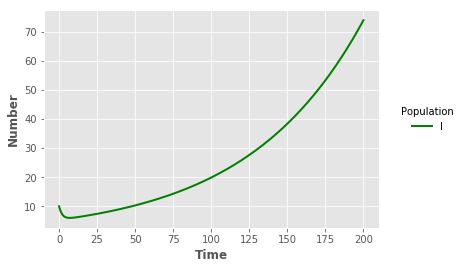

In [11]:
#sLline = plt.plot("t","SL","",data=output_SL,color="red",linewidth=2)
#sHline = plt.plot("t", "SH", "", data = output_SL, color = "red", linewidth = 2)
iline = plt.plot("t","I","",data=output_SL,color="green",linewidth=2)
#rline = plt.plot("t","R","",data=output_SL,color="blue",linewidth=2)
plt.xlabel("Time",fontweight="bold")
plt.ylabel("Number",fontweight="bold")
legend = plt.legend(title="Population",loc=5,bbox_to_anchor=(1.25,0.5))
frame = legend.get_frame()
frame.set_facecolor("white")
frame.set_linewidth(0)

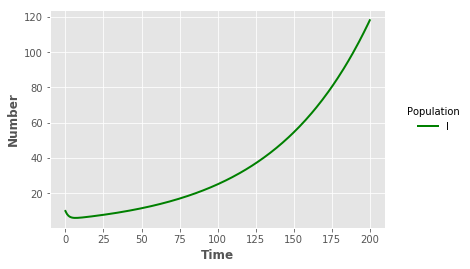

In [12]:
#sLline = plt.plot("t","SL","",data=output_SL,color="red",linewidth=2)
#sHline = plt.plot("t", "SH", "", data = output_SL, color = "red", linewidth = 2)
iline = plt.plot("t","I","",data=output_LIB,color="green",linewidth=2)
#rline = plt.plot("t","R","",data=output_SL,color="blue",linewidth=2)
plt.xlabel("Time",fontweight="bold")
plt.ylabel("Number",fontweight="bold")
legend = plt.legend(title="Population",loc=5,bbox_to_anchor=(1.25,0.5))
frame = legend.get_frame()
frame.set_facecolor("white")
frame.set_linewidth(0)